# Predicting Ski Resort Lift Ticket Prices
### By Group 28

## Introduction
Anyone who has skied or snowboarded in the past few years will almost certainly have noticed the rapid increase in lift ticket prices. What used to be 70-100 dollars a day can now reach higher than $220 for a single day’s lift ticket at modern, large, ski resorts around North America and Europe. 

In this investigation we plan on finding the links between many factors like Max Altitude, Min Altitude, Total Runs, Run Difficulties, Number of Lifts, Snowmaking Capacity and more to determine what affects the lift ticket price the most. We will then use this data to predict lift ticket prices for new resorts to match fair market prices. 

This will be completed using Kaggle user thomasnibb’s “European Ski Resorts” dataset, found at https://www.kaggle.com/datasets/thomasnibb/european-ski-resorts.

## Preliminary exploratory data analysis
Here we will demonstrate how the data can be read into R via the web, clean and tidy it, before summarizing the data into a table and visualizing it.

In [1]:
# Run First
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Reading the Data
url <- "https://raw.githubusercontent.com/alextdart/dsci100-group28-2022wt2/main/European_Ski_Resorts.csv"
raw_data <- read_csv(url, show_col_types = FALSE)

In [3]:
# Cleaning the Data (removing unneeded columns, otherwise is clean already)
head(raw_data)

ski_data <- raw_data |>
    select(HighestPoint:SnowCannons)

head(ski_data)

Row,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alpendorf (Ski amedé),Austria,1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​Canillo/​Encamp (Grandvalira),Andorra,2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
3,Oberau (Wildschönau),Austria,1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
4,Dachstein West,Austria,1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
5,Rosa Khutor,Southern Russia,2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450
6,Białka Tatrzańska-Kotelnica-​Kaniówka-​Bania,Poland,910,680,23,12,3,0,16,Yes,Yes,7,1,0,8,28020,0


HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1980,740,52,30,81,4,115,Yes,No,22,16,11,49,75398,600
2640,1710,47,100,77,33,210,Yes,Yes,37,28,7,72,99017,1032
1130,900,30,1,0,1,2,No,No,2,0,0,2,1932,0
1620,780,42,15,33,3,51,Yes,Yes,25,8,3,36,32938,163
2320,940,22,30,26,21,77,Yes,No,6,11,10,27,49228,450
910,680,23,12,3,0,16,Yes,Yes,7,1,0,8,28020,0


In [5]:
# Summary Table
#    TODO
# Count the number of observations in each class
class_counts <- count(ski_data, wt = NULL, sort = FALSE, name = "Observations")

# Count the number of rows with missing values in the dataset
n_missing_rows <- sum(!complete.cases(ski_data))
# Create a data frame with the given data
df <- data.frame(
  HighestPoint = c(1980, 2640, 1130, 1620, 2320, 910),
  LowestPoint = c(740, 1710, 900, 780, 940, 680),
  DayPassPriceAdult = c(52, 47, 30, 42, 22, 23),
  BeginnerSlope = c(30, 100, 1, 15, 30, 12),
  IntermediateSlope = c(81, 77, 0, 33, 26, 3),
  DifficultSlope = c(4, 33, 1, 3, 21, 0),
  TotalSlope = c(115, 210, 2, 51, 77, 16),
  Snowparks = c("Yes", "Yes", "No", "Yes", "Yes", "Yes"),
  NightSki = c("No", "Yes", "No", "Yes", "No", "Yes"),
  SurfaceLifts = c(22, 37, 2, 25, 6, 7),
  ChairLifts = c(16, 28, 0, 8, 11, 1),
  GondolaLifts = c(11, 7, 0, 3, 10, 0),
  TotalLifts = c(49, 72, 2, 36, 27, 8),
  LiftCapacity = c(75398, 99017, 1932, 32938, 49228, 28020),
  SnowCannons = c(600, 1032, 0, 163, 450, 0)
)

# Calculate the mean of the predictor variables
mean_df <- sapply(df[,1:15], mean)

output_table <- bind_rows(
  data.frame(variable = "Class Counts", class_counts),
  data.frame(variable = "Missing Rows", n_missing_rows),
  data.frame(variable = "Mean of Predictor Variables", t(mean_df))
)

# View the output table
output_table

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


variable,Observations,n_missing_rows,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,Snowparks,NightSki,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Class Counts,376,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Missing Rows,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Mean of Predictor Variables,NA,NA,1766.667,958.3333,36,31.33333,36.66667,10.33333,78.5,NA,NA,16.5,10.66667,5.166667,32.33333,47755.5,374.1667


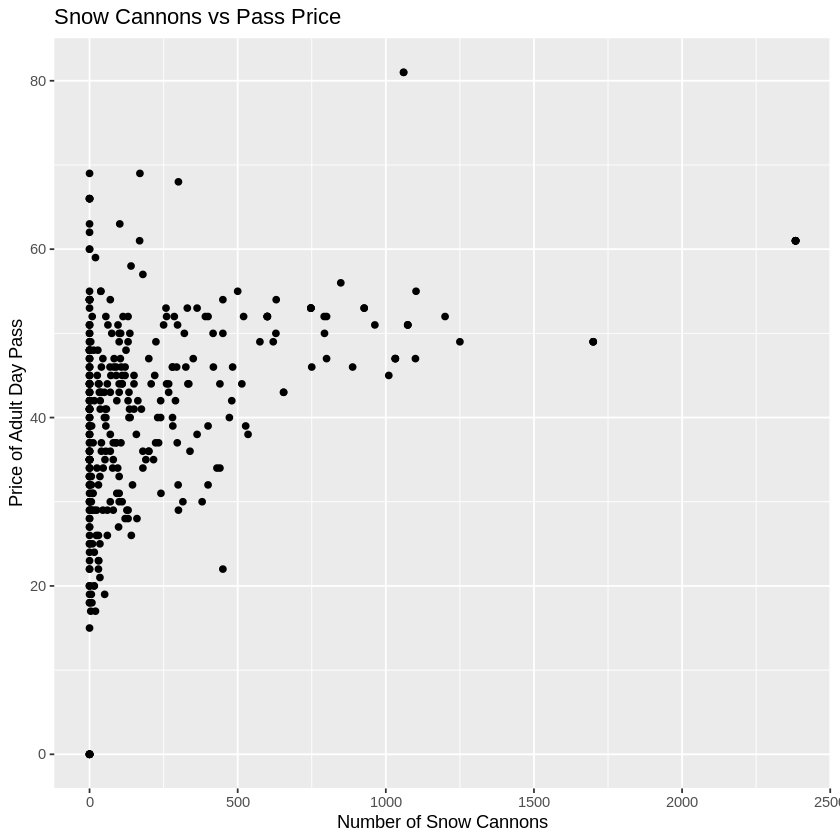

In [9]:
# Summary Visualization
#    TODO
plot <- ggplot(ski_data, aes(x=TotalSlope,y=DayPassPriceAdult))+
        geom_point() +
        labs(x="Number of Slopes",y="Price of Adult Day Pass",title="Snow Cannons vs Pass Price")
plot

## Methods
We’ll use the numeric and boolean columns (all but Resort Name, Country and Row number) to help us predict DayPassPriceAdult - the price of a Day Pass for a resort. Country is too varied to help us gain accuracy in prediction and is thus excluded. Row number, similarly, isn't relevant and the resort name is unique and most likely has no impact on ticket price.

There are many ways we can use the linear regression model we learnt in Week 8 to predict the price of a lift ticket in a new ski resort. We can create multiple recipes — each with different variables as predictors — before plotting them to see if there was any sort of correlation. As an example; we can create a recipe that predicts the price of tickets by using Total Slopes as the predictor. We can then graph these with a scatter plot and trend line to determine if there are any trends between all plots.

## Expected outcomes and significance

There is no certain way we can predetermine our predictions; there could be outliers that break the trend we find. However, as higher quality often means more expenses, we expect to find resorts with better quality (more Slopes, Lifts, Lift Capacity, Snow Cannons, and so on) to be more expensive.

Our findings would be important for those who like skiing and have a budget. Finding whether or not there is a pattern linking price and certain aspects of a resort would greatly help those who ski to save money. We're, in a sense, finding the way to predict whether a new and unknown ski resort will deliver a good cost-to-fun efficiency. As inflation is always increasing everywhere, it would be useful to have some method of saving some money without losing all the things that make life enjoyable.

These findings may lead to questions like: How can a resort maximize profit while minimizing expenses on facilities? How should the difficulty of ski slopes affect prices?